In [26]:
import numpy as np
import pandas as pd

# Define method

In [27]:
def is_japanese(string):
    for chr in string:
        try:
            name = unicodedata.name(ch)
            if "CJK UNIFIED" in name or "HIRAGANA" in name or "KATAKANA" in name:
                return true
            
        except:
            continue
    
    return False

def RMSLE(x : np.ndarray, y : np.ndarray):
    x_log = np.log(x + 1)
    y_log = np.log(y + 1)
    mse = ((x_log - y_log)**2).sum() / len(y)
    rmsle = np.sqrt(mse)
    
    return rmsle

def new_category(x):
    if x in [1, 30, 43, 44, 10, 20, 24]:
        return 1
    elif x in [26, 27, 28]:
        return 2
    else:
        return x

def relate_category(x):
    if x in [30, 43, 44]:
        return 0
    else:
        return 1

def judge_channel_over_100(x):
    if x in ["ANNnewsCH", "Khan Academy", "Khan Academy", "TED", "UNIVERSAL MUSIC JAPAN", "avex"]:
        return x
    else:
        return "others"
    
def is_insta_in_description(x):
    x = x.lower()
    is_insta = (bool(re.search("insta", x)) or bool(re.search("インスタ", x)))
    return is_insta

def is_twitter_in_description(x):
    x = x.lower()
    is_twitter = (bool(re.search("twitter", x)) or bool(re.search("ツイッター", x)))
    return is_twitter

def is_facebook_in_description(x):
    x = x.lower()
    is_facebook = (bool(re.search("facebook", x)) or bool(re.search("フェイスブック", x)))
    return is_facebook

# Preprocessing 

In [28]:
def fillNan(df):
    df["tags"].fillna("[none]", inplace=True)
    df["description"].fillna(" ", inplace=True)
    df["title"].fillna(" ", inplace=True)
    
    return df

def boolToInt(df):
    df["comments_disabled"] = df["comments_disabled"].astype(np.int16)
    df["ratings_disabled"] = df["ratings_disabled"].astype(np.int16)
    
    return df

def logarize(df):
    df["log_likes"] = np.log(df["likes"] + 1)
    df["log_dislikes"] = np.log(df["dislikes"] + 1)
    df["log_comment_count"] = np.log(df["comment_count"] + 1)
    
    return df

def likes_dislikes_ratio(df):
    df["likes_dislikes_ratio"] = df["likes"] / (df["dislikes"] + 1)
    return df

def comments_likes_ratio(df):
    df["comments_likes_ratio"] = df["comment_count"] / (df["likes"] + 1)
    return df

def comments_dislikes_ratio(df):
    df["comments_dislikes_ratio"] = df["comment_count"] / (df["dislikes"] + 1)
    return df

def likes_comments_disabled(df):
    df["likes_comments_disabled"] = np.log(df["likes"] * df["comments_disabled"] + 1)
    return df

def dislikes_commentes_diabled(df):
    df["dislikes_comments_disabled"] = np.log(df["likes"] * df["comments_disabled"] + 1)
    return df

def comments_ratings_diabled(df):
    df["comments_ratings_diabled"] = np.log(df["comment_count"] * df["ratings_disabled"] + 1)
    return df

def getTagDetail(df):
    df["num_tags"] = df["tags"].astype(str).apply(lambda x : len(x.split("|")))
    df["length_tags"] = df["tags"].astype(str).apply(lambda x : len(x))
    df["tags_point"] = df["tags"].apply(lambda x : sum([bool(re.search("[a-zA-Z0-9]", px)) for px in x.split("|")])) # ??
    df["count_en_tag"] = df["tags"].apply(lambda x : sum([bool(re.search("[a-zA-Z0-9]", px)) for px in x.split("|")]))
    df["count_ja_tag"] = df["tags"].apply(lambda x : sum([is_japanese(px) for px in x.split("|")]))
    
    return df

def getPublishedAtDetail(df):
    df["publishedAt"] = pd.to_datetime(df["publishedAt"], utc=True)
    df["publishedAt_year"] = df["publishedAt"].apply(lambda x: x.year)
    df["publishedAt_month"] = df["publishedAt"].apply(lambda x: x.month)
    df["publishedAt_day"] = df["publishedAt"].apply(lambda x: x.day)
    df["publishedAt_hour"] = df["publishedAt"].apply(lambda x: x.hour)
    df["publishedAt_minute"] = df["publishedAt"].apply(lambda x: x.minute)
    df["publishedAt_second"] = df["publishedAt"].apply(lambda x: x.second)
    df["publishedAt_dayofweek"] = df["publishedAt"].apply(lambda x: x.dayofweek)
    
    return df

def getColletction_dateDetail(df):
    df["collection_date"] = pd.to_datetime("20"+df["collection_date"].astype(str), format="%Y.%d.%m", utc=True)
    df["collection_date_year"] = df["collection_date"].apply(lambda x : x.year)
    df["collection_date_month"] = df["collection_date"].apply(lambda x : x.month)
    df["collection_date_day"] = df["collection_date"].apply(lambda x : x.day)
    
    return df

def delta(df):
    df["delta"] = (df["collection_date"] - df["publishedAt"]).apply(lambda x: x.days)
    df["logdelta"] = np.log(df["delta"])
    #df["sqrtdelta"] = np.sqrt(df["delta"])
    df["published_delta"] = (df["publishedAt"] - df["publishedAt"].min()).apply(lambda x: x.days)
    df["collection_delta"] = (df["collection_date"] - df["collection_date"].min()).apply(lambda x: x.days)
    
    return df

def getDescriptionDetail(df):
    df["is_http_in_dis"] = df["description"].astype(str).apply(lambda x: x.lower().count("http"))
    df["len_description"] = df["description"].astype(str).apply(lambda x: len(x))
    #df["is_insta_in_dis"] = df["description"].astype(str).apply(lambda x : is_insta_in_description(x)) #
    #df["is_twitter_in_dis"] = df["description"].astype(str).apply(lambda x : is_twitter_in_description(x))
    df["is_insta_in_dis"] = df["description"].apply(lambda x : x.lower().count("insta"))
    df["is_twitter_in_dis"] = df["description"].apply(lambda x : x.lower().count("twitter"))
    #df["is_facebook_in_dis"] = df["description"].astype(str).apply(lambda x : is_facebook_in_description(x))
    return df

def lenTitle(df):
    df["len_title"] = df["title"].apply(lambda x : len(x))
    
    return df

def confirmJapanese(df):
    df["ja_title"] = df["title"].apply(lambda x: is_japanese(x)).astype(np.int)
    df["ja_tags"] = df["tags"].apply(lambda x: is_japanese(x)).astype(np.int)
    df["ja_description"] = df["description"].apply(lambda x: is_japanese(x)).astype(np.int)
    
    return df

def countEnglish(df):
    df["en_title"] = df["title"].apply(lambda x: len(re.findall(r'[a-zA-Z0-9]', x.lower())))
    df["en_tags"] = df["tags"].apply(lambda x: len(re.findall(r'[a-zA-Z0-9]', x.lower())))
    df["en_description"] = df["description"].apply(lambda x: len(re.findall(r'[a-zA-Z0-9]', x.lower())))
    
    return df

def getMusic(df):
    df["music_title"] = df["title"].apply(lambda x: "music" in x.lower()).astype(np.int)
    df["music_tags"] = df["tags"].apply(lambda x: "music" in x.lower()).astype(np.int)
    df["music_description"] = df["description"].apply(lambda x: "music" in x.lower()).astype(np.int)
    
    return df

def confirmOfficial(df):
    df["is_off"] = df["title"].apply(lambda x: "fficial" in x.lower()).astype(np.int)
    df["is_off_channell"] = df["channelTitle"].apply(lambda x: "fficial" in x.lower()).astype(np.int)
    df["is_off_ja"] = df["title"].apply(lambda x: "公式" in x.lower()).astype(np.int)
    df["is_off_channell_ja"] = df["channelTitle"].apply(lambda x: "公式" in x.lower()).astype(np.int)
    
    return df

def getCM(df):
    df["cm_title"] = df["title"].apply(lambda x: "cm" in x.lower()).astype(np.int)
    df["cm_tags"] = df["tags"].apply(lambda x: "cm" in x.lower()).astype(np.int)
    df["cm_description"] = df["description"].apply(lambda x: "cm" in x.lower()).astype(np.int)
    
    return df

def get_dummies_from_category(df):
    #df["new_category"] = df["categoryId"].apply(lambda x : new_category(x))
    df = pd.concat([df, pd.get_dummies(df["categoryId"])], axis=1)
    del df["categoryId"]
    return df


def get_num_channel_over_100(df):
    df["channelTitle"] = df["channelTitle"].apply(lambda x : judge_channel_over_100(x))
    df = pd.concat([df, pd.get_dummies(df["channelTitle"])], axis=1)
    return df

def judge_categoryId_over_30(df):
    df["categoryId_over_30"] = df["categoryId"].apply(lambda x : 1 if x >= 30 else 0)
    return df

In [30]:
train = pd.read_csv("data/train_data.csv")
test = pd.read_csv("data/test_data.csv")
train.shape

(19720, 17)

In [80]:
train.iloc[1088, :]

id                                                                1089
video_id                                                   5yUXVTX8iWw
title                【日本史第６弾】ついに戦国〜江戸時代編に突入！中田敦彦のエクストリーム授業！織田信長・豊臣秀...
publishedAt                                   2019-05-29T12:19:04.000Z
channelId                                     UCFo4kqllbcQ4nV83WCyraiw
channelTitle                                            中田敦彦のYouTube大学
categoryId                                                          24
collection_date                                               20.09.02
tags                 #中田敦彦|#オリエンタルラジオ|#オリラジ|#RADIOFISH|歴史|世界史|日本史|授...
likes                                                             9865
dislikes                                                           653
comment_count                                                      932
thumbnail_link          https://i.ytimg.com/vi/5yUXVTX8iWw/default.jpg
comments_disabled                                                False
rating

In [78]:
train.iloc[1098, :]

id                                                                1099
video_id                                                   fud4-L2lnqQ
title                      【サピエンス全史】1200万部突破の世界的ベストセラーを世界一わかりやすく解説〜上巻〜
publishedAt                                   2019-12-08T14:01:04.000Z
channelId                                     UCFo4kqllbcQ4nV83WCyraiw
channelTitle                                            中田敦彦のYouTube大学
categoryId                                                          24
collection_date                                               20.09.02
tags                 #中田敦彦|#オリエンタルラジオ|#オリラジ|#RADIOFISH|歴史|世界史|日本史|授...
likes                                                            10648
dislikes                                                           549
comment_count                                                     1074
thumbnail_link          https://i.ytimg.com/vi/fud4-L2lnqQ/default.jpg
comments_disabled                                                False
rating

In [33]:
import cv2
from matplotlib import pyplot as plt

[200 203 164]


-1.054054054054054

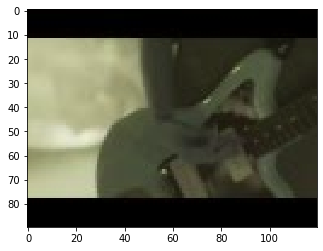

In [59]:
img = cv2.imread("thumbnail/train/image_00001.jpeg")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img[50,0, :])
plt.imshow(img)
(203 - 164)/(1 - abs(203 - 164 - 1))

[ 88 184  70]


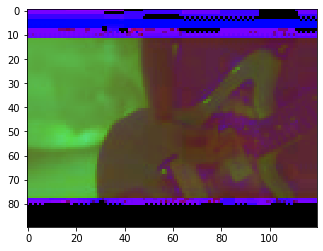

In [60]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
print(img[50,0, :])
plt.imshow(img)

# Run preprocessing

In [126]:
def preprocessing(df, df_test, methods):
    for method in methods:
        df = method(df)
        df_test = method(df_test)
    
    return df, df_test

In [127]:
train, test = preprocessing(
    train, 
    test, 
    [fillNan, 
     logarize, 
     boolToInt,
     likes_dislikes_ratio,
     comments_likes_ratio,
     comments_dislikes_ratio,
     likes_comments_disabled,
     dislikes_commentes_diabled,
     comments_ratings_diabled,
     getTagDetail,
     getPublishedAtDetail,
     getColletction_dateDetail,
     delta,
     getDescriptionDetail,
     lenTitle,
     confirmJapanese,
     countEnglish,
     getMusic,
     confirmOfficial,
     getCM,
     #get_dummies_from_category,
     get_num_channel_over_100,
     #judge_categoryId_over_30
    ]
)



Category ID, カテゴリへの関連付け  
1 : Film and animation 1   
2 : Autos and vehicles 1   
10 : Music 1   
15 : Pets and animals 1   
17 : Sports 1   
19 : Travel and events 1   
20 : Gaming 1   
22 : People and blogs 1   
23 : Comedy 1   
24 : Entertainment 1   
25 : News and politics 1   
26 : Howto and style 1   
27 : Education 1   
28 : Science and technology 1   
29 : ?  
30 : Movies 0   
43 : Shows（番組）0   
44 : Trailers（予告編）0   

Movies, entertaiments 1 - 30 - 43 - 44 - (10) - (20) -(24)  
Vhehicles 2  
Sounds 10  
Animals 15  
Sports 17  
Travels 19  
Games 20  
Blogs : 22 - 26  
Politics : 25  
Howto : 26  
Study : (26) - 27 - 28  


# Prepare data

In [128]:
idx = []
for column in train.columns:
    if column in ["y", "likes", "dislikes", "comment_count", 
                  "delta", "channelId", "video_id", "title",
                  "description", "thumbnail_link", 
                  "tags", "publishedAt", "collection_date", "id", "channelTitle"]:#, "categoryId"]:
        continue
    idx.append(column)
print("idx : ", idx)

idx :  ['categoryId', 'comments_disabled', 'ratings_disabled', 'log_likes', 'log_dislikes', 'log_comment_count', 'likes_dislikes_ratio', 'comments_likes_ratio', 'comments_dislikes_ratio', 'likes_comments_disabled', 'dislikes_comments_disabled', 'comments_ratings_diabled', 'num_tags', 'length_tags', 'tags_point', 'count_en_tag', 'count_ja_tag', 'publishedAt_year', 'publishedAt_month', 'publishedAt_day', 'publishedAt_hour', 'publishedAt_minute', 'publishedAt_second', 'publishedAt_dayofweek', 'collection_date_year', 'collection_date_month', 'collection_date_day', 'logdelta', 'published_delta', 'collection_delta', 'is_http_in_dis', 'len_description', 'is_insta_in_dis', 'is_twitter_in_dis', 'len_title', 'ja_title', 'ja_tags', 'ja_description', 'en_title', 'en_tags', 'en_description', 'music_title', 'music_tags', 'music_description', 'is_off', 'is_off_channell', 'is_off_ja', 'is_off_channell_ja', 'cm_title', 'cm_tags', 'cm_description', 'ANNnewsCH', 'Khan Academy', 'TED', 'UNIVERSAL MUSIC JA

In [129]:
X = train.loc[:, idx].values
Y = np.log(train.loc[:, "y"]).values

print("X shape : ", X.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

X shape :  (19720, 57)



# Build a model and validation

In [102]:
K = 4

print("K = ", K)
kf = KFold(n_splits = K, shuffle=True, random_state=42).split(x_train, y_train)
gbm = [None] * K
scores = []
scores_test = []
for i, (train_idx, test_idx) in enumerate(kf):
    x_train = X[train_idx]
    y_train = Y[train_idx]
    x_test = X[test_idx]
    y_test = Y[test_idx]
   
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_test = lgb.Dataset(x_test, y_test)



    # LightGBM parameters
    params = {
            'task' : 'train',
            'boosting_type' : 'gbdt',
            'objective' : 'regression',
            'metric' : "rmse",
            'num_leaves' : 32,
            'learning_rate' : 0.01,
            #'feature_fraction' : 0.9,
            #'bagging_fraction' : 0.8,
            #'bagging_freq': 5,
            'random_state' : 42


    }

    # train
    gbm[i] = lgb.train(
        params,
        lgb_train,
        num_boost_round=10000,
        valid_sets=lgb_test,
        early_stopping_rounds=100, 
        verbose_eval=10000
    )


    y_pred = gbm[i].predict(x_test, num_iteration=gbm[i].best_iteration)
    y_pred = np.exp(y_pred).astype(int)
    y_pred[y_pred < 0] = 0
    rmsle_test = RMSLE(y_pred, np.exp(y_test))

    scores_test.append(rmsle_test)


print("Test RMSLE : {}±{}".format(np.mean(scores_test), np.var(scores_test)))



K =  4
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1403]	valid_0's rmse: 0.854798
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1180]	valid_0's rmse: 0.934997
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[857]	valid_0's rmse: 0.853014
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2335]	valid_0's rmse: 0.82975
Test RMSLE : 0.8677254918926922±0.0015941995790084965


Provisual best score : 0.8166593973772355±0.0007880495387959792

# Let model learn with Kfold and predict test data.

In [130]:
K = 11

print("K = ", K)
kf = KFold(n_splits = K, shuffle=True, random_state=42).split(X, Y)
gbm = [None] * K
scores = []
scores_test = []
for i, (train_idx, test_idx) in enumerate(kf):
    x_train = X[train_idx]
    y_train = Y[train_idx]
    x_test = X[test_idx]
    y_test = Y[test_idx]
   
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_test = lgb.Dataset(x_test, y_test)



    # LightGBM parameters
    params = {
            'task' : 'train',
            'boosting_type' : 'gbdt',
            'objective' : 'regression',
            'metric' : "rmse",
            'num_leaves' : 32,
            'learning_rate' : 0.01,
            #'feature_fraction' : 0.9,
            #'bagging_fraction' : 0.8,
            #'bagging_freq': 5,
            'random_state' : 42


    }

    # train
    gbm[i] = lgb.train(
        params,
        lgb_train,
        num_boost_round=10000,
        valid_sets=lgb_test,
        early_stopping_rounds=100, 
        verbose_eval=10000
    )

    y_pred = gbm[i].predict(x_train, num_iteration=gbm[i].best_iteration)
    y_pred = np.exp(y_pred).astype(int)
    y_pred[y_pred < 0] = 0
    rmsle_train = RMSLE(y_pred, np.exp(y_train))
    y_pred = gbm[i].predict(x_test, num_iteration=gbm[i].best_iteration)
    y_pred = np.exp(y_pred).astype(int)
    y_pred[y_pred < 0] = 0
    rmsle_test = RMSLE(y_pred, np.exp(y_test))

    scores.append(rmsle_train)
    scores_test.append(rmsle_test)


print("Training RMSLE :{}±{} ".format(np.mean(scores), np.var(scores)))
print("Test RMSLE : {}±{}".format(np.mean(scores_test), np.var(scores_test)))


K =  11
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2932]	valid_0's rmse: 0.82372
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1605]	valid_0's rmse: 0.852365
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2476]	valid_0's rmse: 0.793982
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2059]	valid_0's rmse: 0.858234
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2134]	valid_0's rmse: 0.791149
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1923]	valid_0's rmse: 0.774793
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2849]	valid_0's rmse: 0.80341
Training until validation scores don't improve for 100 rounds
Early stopping, best iteratio

In [131]:
t = test.loc[:, idx].values

In [132]:
K = 11
y_pred = np.array([0.] * len(t))
for x in range(K):
    pred = gbm[x].predict(t, num_iteration=gbm[x].best_iteration)
    pred = np.exp(pred)
    pred[pred < 0] = 0
    y_pred += pred
    

y_pred = (y_pred / K).astype(np.int)

In [133]:
data = np.array([list(range(1, len(y_pred)+1)), y_pred]).T
df_submit = pd.DataFrame(
    data,
    columns=["id", "y"]
)

In [134]:
df_submit.head()

,id,y
0,1,257234
1,2,2622811
2,3,886744
3,4,163382
4,5,251


In [120]:
df_submit.to_csv("submit_7.csv", index=False)

# CNN

In [11]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
import cv2
from torchvision import transforms
import pytorch_lightning as pl
import numpy as np
import random
from PIL import Image
import cloudpickle
from pathlib import Path
from pytorch_lightning.loggers import CometLogger
import  pandas as pd
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [2]:
train = pd.read_csv("data/train_data.csv")
test = pd.read_csv("data/test_data.csv")
train.shape

(19720, 17)

In [3]:
def RMSE(x , y):
    mse = ((x - y)**2).mean()
    rmse = torch.sqrt(mse)

    return rmse

In [4]:
class EfficientNetDataset(Dataset):
    def __init__(self, dataset, series, transform, phase="train"):
        super(EfficientNetDataset, self).__init__()
        self.dataset = dataset
        self.series = series
        self.phase = phase
        self.transform = transform
    
        
    def __len__(self):
        return len(self.series)
    
    def __getitem__(self, index):
        path = self.dataset[index]
        label = self.series[index]
        label = label[np.newaxis,...]
        image = Image.open(path)
        image = self.transform(self.phase, image)
        
        return image, label

class EfficientNetTransform():
    def __init__(self, input_size):
        self.transforms = {
            "train" : transforms.Compose([
                transforms.Resize(input_size),
                transforms.ToTensor(), 
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ]), 
            "val" : transforms.Compose([
                transforms.Resize(input_size),
                transforms.ToTensor(),
                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
            ])
        }
        
    def __call__(self, phase, image):
        image = self.transforms[phase](image)
        
        return image

class EfficientNetModel(nn.Module):
    def __init__(self):
        super(EfficientNetModel, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b7')
        
        #Actually, you should set learning rate for each layer.
        for params in self.model.parameters():
            params.requires_grad = True
        
        num_ftrs = self.model._fc.in_features
        self.model._fc = nn.Linear(num_ftrs, 1)
        
    def forward(self, x):
        x = self.model(x)
        
        return x

class BestModelCheckpoint(object):
    def __init__(self, save_directory, best_name="best.pkl"):
        self.best_value = 10**9
        self.save_directory= Path(save_directory)
        self.save_directory.mkdir(parents=True, exist_ok=True)
        self.best_path = self.save_directory / best_name


    def __call__(self, pred, model):
        if pred < self.best_value:
            self.best_value = pred

            with open(self.best_path, "wb") as f:
                cloudpickle.dump(model, f)


class EfficientNetSystem(pl.LightningModule):
    def __init__(self, train_dataset, train_series, val_dataset, val_series, input_size, batch_size, checkpoint, lr=0.0001, num_workers=6):
        super(EfficientNetSystem, self).__init__()
        use_cuda = torch.cuda.is_available() and True
        self.device = torch.device("cuda" if use_cuda else "cpu")
        self.train_dataset = train_dataset
        self.train_series = train_series
        self.val_dataset = val_dataset
        self.val_series = val_series
        self.input_size = input_size
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.learning_rate = lr
        self.model = EfficientNetModel().to(self.device)
        self.loss = nn.MSELoss(size_average = False)
        self.checkpoint = checkpoint
    
    def forward(self, x):
        x = self.model(x)
        
        return x
    
    def training_step(self, batch, batch_idx):
        image, label = batch
        image = image.to(self.device, dtype=torch.float)
        label = label.to(self.device, dtype=torch.float)
        
        pred = self.forward(image)

        loss = self.loss(pred, label)
                
        tensorboard_logs = {
            "train_loss" : loss
        }
        
        return {"loss" : loss, "log" : tensorboard_logs}
    
    def validation_step(self, batch, batch_idx):
        image, label = batch
        image = image.to(self.device, dtype=torch.float)
        label = label.to(self.device, dtype=torch.float)
        
        pred = self.forward(image)

        loss = self.loss(pred, label)
        
        rmsle = RMSE(pred, label)

        tensorboard_logs = {
            "val_loss" : loss,
            "val_rmsle" : rmsle
        }
        
        return {"val_loss" : loss, "log" : tensorboard_logs}
    
    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
        avg_rmsle = torch.stack([x["log"]["val_rmsle"] for x in outputs]).mean()
        
        self.checkpoint(avg_loss.item(), self.model)
        
        tensorboard_logs = {
            "val_loss" : avg_loss, 
            "val_rmsle" : avg_rmsle
        }
        progress_bar = {
            "val_loss" : avg_loss,
            "val_rmsle" : avg_rmsle
        }
        
        return {"avg_val_loss" : avg_loss, "log" : tensorboard_logs, "progress_bar" : progress_bar}
    
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        
        return optimizer
    
    @pl.data_loader
    def train_dataloader(self):
        train_dataset = EfficientNetDataset(
            dataset = self.train_dataset, 
            series = self.train_series,
            transform = EfficientNetTransform(self.input_size)
        )
        
        train_loader = DataLoader(
            train_dataset, 
            shuffle = True, 
            batch_size = self.batch_size,
            num_workers = self.num_workers
        )
        
        return train_loader
    
    @pl.data_loader
    def val_dataloader(self):
        val_dataset = EfficientNetDataset(
            dataset = self.val_dataset, 
            phase="val", 
            series = self.val_series, 
            transform = EfficientNetTransform(self.input_size)
        )
        val_loader = DataLoader(
            val_dataset, 
            batch_size = self.batch_size, 
            num_workers = self.num_workers
        )
        
        return val_loader
    

In [5]:
train_path = Path("thumbnail/train")

In [6]:
dataset = np.array([str(x) for x in sorted(train_path.glob("image*"))])
series = np.array(np.log(train["y"] + 1))

idx = list(range(len(series)))
random.shuffle(idx)

val_size = 0.3
threshold = int(len(series) * 0.3)
train_dataset = dataset[idx][threshold : :]
val_dataset = dataset[idx][ : threshold]
train_series = series[idx][threshold : ]
val_series = series[idx][ : threshold]

In [7]:
system = EfficientNetSystem(
    train_dataset = train_dataset,
    train_series = train_series, 
    val_dataset = val_dataset,
    val_series = val_series,
    input_size = (130, 100),
    batch_size = 64,
    checkpoint = BestModelCheckpoint("model"),
    lr=0.01
)

comet_logger = CometLogger(
            api_key = "IowbTppLPOohqhcDtzxw76Cot",
            project_name = "youtube",  
            experiment_name = "Efficient Net",
            save_dir = "log"
)


trainer = pl.Trainer(
    num_sanity_val_step = 0,
    max_epochs = 50,
    checkpoint_callback = None,
    logger = comet_logger, 
    gpus = [0, 1],
    distributed_backend='dp'
)
trainer.fit(system)

Loaded pretrained weights for efficientnet-b7


/home/vmlab/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
INFO:lightning:CometLogger will be initialized in online mode
COMET INFO: old comet version (3.1.8) detected. current: 3.1.9 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/t-rryyyoooo/youtube/df11c26a160a476d8e47f7e3b66a9ac4

INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0,1
INFO:lightning:
    | Name                                                  | Type                    | Params
----------------------------------------------------------------------------------------------
0   | model                                                 | EfficientNetModel       | 63 M  
1   | model.model                                           | EfficientNet  

/home/vmlab/.local/lib/python3.6/site-packages/torch/nn/parallel/_functions.py:61: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


/home/vmlab/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/t-rryyyoooo/youtube/df11c26a160a476d8e47f7e3b66a9ac4
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [1100] : (15.929756164550781, 5496.1669921875)
COMET INFO:     val_loss [49]     : (153.5045928955078, 51752.9453125)
COMET INFO:     val_rmsle [49]    : (2.170644521713257, 31.470251083374023)
COMET INFO:   Others:
COMET INFO:     Name : Efficient Net
COMET INFO:   Uploads:
COMET INFO:     code                     : 1 (7 KB)
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (113 KB)
COMET INFO:     installed packages       : 1
COMET INFO:     os packages              : 1
COMET INFO: ----------------

COMET INFO: Uploading stats to Comet before program termination (may take several seconds)


1

In [17]:
test_path = Path("thumbnail/test")
test_dataset = np.array([str(x) for x in sorted(test_path.glob("image*"))])

model_path = "model/best.pkl"
gpuid = [0]
with open(model_path, "rb") as f:
    model = cloudpickle.load(f)
    model = torch.nn.DataParallel(model, device_ids=gpuid)

model.eval()
pred_list = []
transform = EfficientNetTransform((130, 100))
for path in test_dataset:
    image = Image.open(path)
    image = transform("val", image)
    image = image[np.newaxis, ...]
    
    pred = model(image)
    pred = pred.to("cpu").detach().numpy().astype(np.uint8)
    pred = np.squeeze(pred)
    pred_list.append(pred)
    
pred_list = np.array(pred_list)
pred_list = np.exp(pred_list)
pred_list[pred_list < 0] = 0


/home/vmlab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


False